# Noise stem demo

We're going to load in our old friend the Amen (in stereo but also works in mono) and obliterate it (so we can put it back together again).

**NOTE:** this demo gives you a lower level view of what steps are carried out in the code. If you'd just like to generate the stems then I recommend simply using the python CLI described in the README.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from matplotlib import pyplot as plt
from IPython.display import Audio, display

from generate_stems import load_sample, generate_stems, validate_stems, save_stems

## Helper functions

In [3]:
def plot_signal(samples):
    """
    Plots the given signal samples.

    Parameters:
    - samples: numpy.ndarray
        The signal samples to be plotted.

    Returns:
    None
    """
    if samples.ndim == 1:
        _, ax = plt.subplots(1, 1, figsize=(12, 3))
        ax.plot(samples, color="gray", lw=0.5)
        ax.set_xlabel("Sample")
        ax.set_ylabel("Amplitude")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_xlim(0, len(samples))
        ax.set_ylim(-B, B)

    if samples.ndim == 2:
        _, axes = plt.subplots(2, 1, figsize=(12, 6))

        # Plot the signals with each channel separated on the y-axis
        axes[0].plot(samples[:, 0], label="Left channel", color="gray", lw=0.5)
        axes[0].set_ylabel("L", rotation=0, size="large")
        axes[0].spines["top"].set_visible(False)
        axes[0].spines["right"].set_visible(False)
        axes[0].spines["bottom"].set_visible(False)
        axes[0].set_xticks([])  # Remove x ticks

        axes[1].plot(samples[:, 1], label="Right channel", color="gray", lw=0.5)
        axes[1].set_xlabel("Sample")
        axes[1].set_ylabel("R", rotation=0, size="large")
        axes[1].spines["top"].set_visible(False)
        axes[1].spines["right"].set_visible(False)


def display_clips(clips, sample_rate):
    """
    Display audio clips.

    Args:
        clips (list or ndarray): List of audio clips or a single audio clip of shape (samples, 2) for stereo or (samples,) for mono.
        sample_rate (int): Sample rate of the audio clips.

    Returns:
        None
    """
    if clips.ndim == 2:
        display(Audio(clips.T, rate=sample_rate))
    elif clips.ndim == 3:
        for clip in clips:
            display(Audio(clip.T, rate=sample_rate))

## Data

In [4]:
SAMPLE = Path("samples/amen_stereo.wav")
assert SAMPLE.exists()

OUT = Path("output")
assert OUT.exists()

## Generate stems

In [5]:
N = 3  # Number of stems to generate

samples, sample_rate = load_sample(SAMPLE)
stems = generate_stems(samples, N)
validate_stems(stems, samples)

**ORIGINAL:**

In [ ]:
display_clips(samples, sample_rate)

**STEMS:**

In [ ]:
display_clips(stems, sample_rate)

**🪄 SUMMED STEMS:**

In [ ]:
display_clips(stems.sum(0), sample_rate)

## Waveforms

Let's look at the waveforms for fun.

The original:

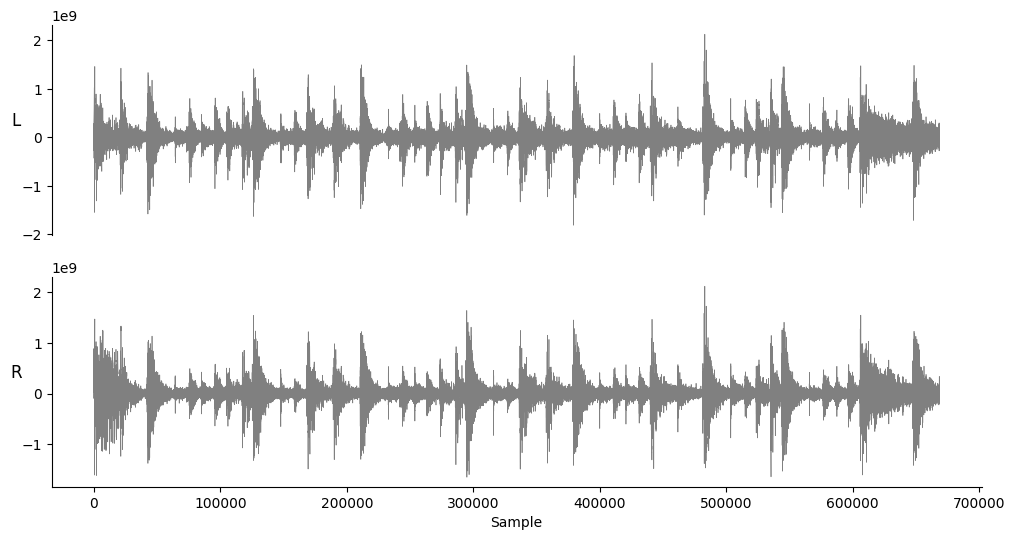

In [9]:
plot_signal(samples)

The stems all look like this:

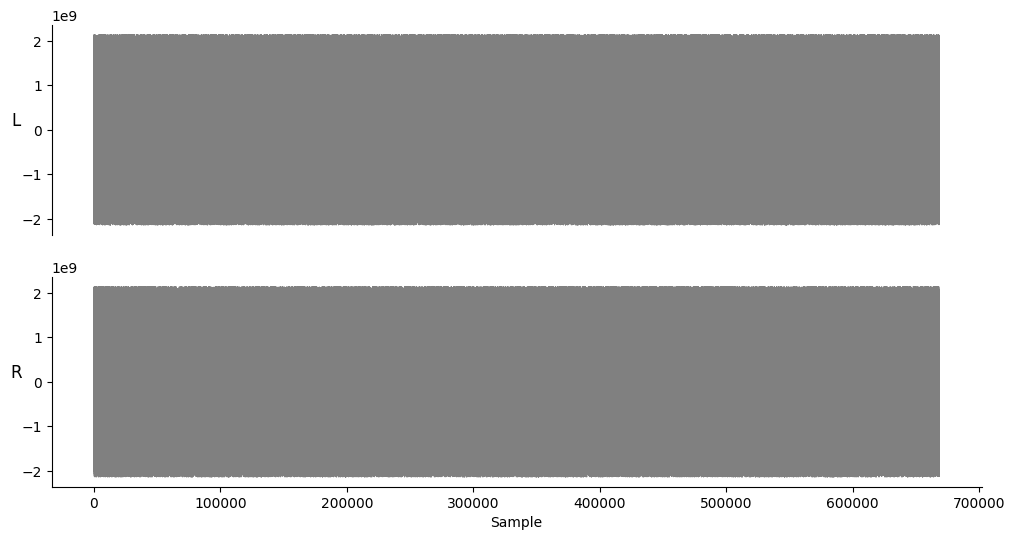

In [10]:
plot_signal(stems[0])

Noisy.

If you want you can save them now.

In [11]:
# save_stems(stems, sample_rate, OUT, SAMPLE.stem)